# Veri Analizi için Python CheatSheet

**Açıklama**

Bu dosyada bir veriyi analiz ederken genel olarak kullanılan fonksiyonları ve bu fonksiyonların kullanılışlarını özetleyeceğim. Başlıklarım kabaca aşağıdaki gibidir: 

+ Veri setini (DataFrame) keşfetme
+ Sıralama ve Alt Kümeleme (Sorting and Subsetting)
+ Veri setinde işlemler yapma (Aggregating DataFrames)
+ Veri setinde sayma yapma (Counting)
+ Veri setini kendi içinde belirli şekilde gruplandırma (Grouping)
+ Pivot tabloları oluşturma (Pivot Table)
+ Veri setini istenilen şekilde dilimleme ve indekslendirme (Slicing and Indexing)
+ Veri setindeki kayıp değerleri bulma (Missing Values)
+ Veri tipi kısıtlamalarını giderme (Data Type Constraints)
+ Veri aralığı kısıtlamalarını giderme (Data Range Constraints) 
+ Veri setinde tekrar eden satırların yarattığı kısıtlamaları giderme (Uniqueness Constraints) 
+ Veri setinde eşsiz olan değerlerin bulunması (Membership Constraints) 
+ Farklı veri setlerini birleştirme (Data Merge) 
+ Veriyi yeniden şekillendirme (Data Reshaping) 

In [1]:
import pandas as pd
import numpy as np

# Yeni bir DataFrame oluştur
np.random.seed(42)
new_data = {
    'Column1': np.random.rand(50),
    'Column2': np.random.randint(1, 10, size=50),
    'Column3': np.random.choice(['A', 'B', 'C'], size=50),
    'Column4': np.random.randn(50),
    'Column5': np.random.choice([1, 2, np.nan], size=50),
    'Column6': np.random.randint(10, 20, size=50),
}

df = pd.DataFrame(new_data)

# 'StrColumn' ve 'CategoryColumn' sütunlarını ekleyin
df['StrColumn'] = ['str' + str(i) for i in range(50)]
df['CategoryColumn'] = pd.Categorical(['cat1', 'cat2', 'cat3'] * 16 + ['cat1', 'cat2'])

# Rastgele bazı hücreleri NaN (eksik değer) yap
rows = np.random.choice(50, size=(5,))
cols = np.random.choice(8, size=(5,))

df.iloc[rows, cols] = np.nan

# DataFrame'i görüntüle
print(df)

     Column1  Column2 Column3   Column4  Column5  Column6 StrColumn  \
0   0.374540      2.0       C -2.655176      2.0       15      str0   
1   0.950714      2.0       B  0.345518      1.0       15      str1   
2   0.731994      4.0       C -0.395516      1.0       12      str2   
3   0.598658      8.0       C -0.289137      2.0       15      str3   
4   0.156019      7.0       A  0.452936      1.0       17      str4   
5   0.155995      9.0       C -0.166061      2.0       11      str5   
6   0.058084      8.0       C  0.214939      1.0       14      str6   
7   0.866176      5.0       B -2.022315      1.0       10      str7   
8   0.601115      2.0       B -0.943057      NaN       10      str8   
9   0.708073      5.0       A  1.403959      NaN       14      str9   
10  0.020584      8.0       C -0.018551      1.0       12     str10   
11  0.969910      9.0       C -1.673505      1.0       13     str11   
12  0.832443      9.0       C -1.072532      NaN       12     str12   
13  0.

# Veri Setini Keşfetme (Working with DataFrame)

+ pd.head()
+ pd.tail()
+ pd.info()
+ pd.shape
+ pd.describe()
+ pd.values
+ pd.columns
+ pd.index

In [2]:
#1
#pd.head()
#Veri setinin istenilen ilk 'n' satırını döndürür
print(df.head(5))

    Column1  Column2 Column3   Column4  Column5  Column6 StrColumn  \
0  0.374540      2.0       C -2.655176      2.0       15      str0   
1  0.950714      2.0       B  0.345518      1.0       15      str1   
2  0.731994      4.0       C -0.395516      1.0       12      str2   
3  0.598658      8.0       C -0.289137      2.0       15      str3   
4  0.156019      7.0       A  0.452936      1.0       17      str4   

  CategoryColumn  
0           cat1  
1           cat2  
2           cat3  
3           cat1  
4           cat2  


In [3]:
#2
#pd.tail()
#Veri setinin istenilen son 'n' satırını döndürür
print(df.tail(3))

     Column1  Column2 Column3   Column4  Column5  Column6 StrColumn  \
47       NaN      NaN     NaN -0.885512      NaN       10     str47   
48  0.546710      5.0       A -0.356745      2.0       18     str48   
49  0.184854      7.0       A  0.556122      2.0       15     str49   

   CategoryColumn  
47            NaN  
48           cat1  
49           cat2  


In [4]:
#3
#pd.info()
#Veri setinin kabaca bir özetini çıkarır
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Column1         45 non-null     float64 
 1   Column2         45 non-null     float64 
 2   Column3         45 non-null     object  
 3   Column4         50 non-null     float64 
 4   Column5         31 non-null     float64 
 5   Column6         50 non-null     int32   
 6   StrColumn       50 non-null     object  
 7   CategoryColumn  45 non-null     category
dtypes: category(1), float64(4), int32(1), object(2)
memory usage: 2.8+ KB
None


In [5]:
#4
#pd.shape
#Veri setinde kaç satır ve kaç sütun olduğunu döndürür
print(df.shape)

(50, 8)


In [6]:
#5
#pd.describe()
#Veri setinin tanımlayıcı istatistiklerini çıkarır (mean, var, std,...)
print(df.describe())

         Column1    Column2    Column4    Column5    Column6
count  45.000000  45.000000  50.000000  31.000000  50.000000
mean    0.427092   5.466667  -0.119275   1.483871  13.820000
std     0.296648   2.912356   0.909204   0.508001   2.946392
min     0.020584   1.000000  -2.655176   1.000000  10.000000
25%     0.181825   3.000000  -0.746298   1.000000  11.000000
50%     0.366362   7.000000  -0.163499   1.000000  14.000000
75%     0.611853   8.000000   0.521691   2.000000  16.000000
max     0.969910   9.000000   1.706605   2.000000  19.000000


In [7]:
#6
#pd.values
#Veri setindeki gözlemleri döndürür, sütunlar görünmez
print(df.values)

[[0.3745401188473625 2.0 'C' -2.65517604756347 2.0 15 'str0' 'cat1']
 [0.9507143064099162 2.0 'B' 0.3455179438887663 1.0 15 'str1' 'cat2']
 [0.7319939418114051 4.0 'C' -0.39551645158029325 1.0 12 'str2' 'cat3']
 [0.5986584841970366 8.0 'C' -0.289136856469942 2.0 15 'str3' 'cat1']
 [0.15601864044243652 7.0 'A' 0.45293632653350946 1.0 17 'str4' 'cat2']
 [0.15599452033620265 9.0 'C' -0.16606090835106535 2.0 11 'str5' 'cat3']
 [0.05808361216819946 8.0 'C' 0.214938830094755 1.0 14 'str6' 'cat1']
 [0.8661761457749352 5.0 'B' -2.022314933195735 1.0 10 'str7' 'cat2']
 [0.6011150117432088 2.0 'B' -0.9430568084672624 nan 10 'str8' 'cat3']
 [0.7080725777960455 5.0 'A' 1.4039587386592935 nan 14 'str9' 'cat1']
 [0.020584494295802447 8.0 'C' -0.018550804511640224 1.0 12 'str10'
  'cat2']
 [0.9699098521619943 9.0 'C' -1.6735046219902232 1.0 13 'str11' 'cat3']
 [0.8324426408004217 9.0 'C' -1.0725318344356576 nan 12 'str12' 'cat1']
 [0.21233911067827616 1.0 'A' -0.9925861794031905 nan 10 'str13' 'cat2'

In [8]:
#7
#pd.columns
#Veri setindeki sütunların adlarını döndürür
print(df.columns)

Index(['Column1', 'Column2', 'Column3', 'Column4', 'Column5', 'Column6',
       'StrColumn', 'CategoryColumn'],
      dtype='object')


In [9]:
#8
#pd.index
#Veri setin index için ayrı bir etkilendirme varsa onları döndürür, yoksa direkt olarak index değerlerini sayısal olarak döndürür
print(df.index)

RangeIndex(start=0, stop=50, step=1)


# Veri Setinde Sıralama Yapma (Sorting and Subsetting)

+ pd.sort_values()

In [10]:
#9
#pd.sort_values()
#Veri setinde, istenilen sütundaki değerleri küçükten büyüğe veya büyükten küçüğe doğru sıralar
print(df.sort_values("Column4")) #Böyle yazılırsa bütün veri setiyle beraber döndürülür

     Column1  Column2 Column3   Column4  Column5  Column6 StrColumn  \
0   0.374540      2.0       C -2.655176      2.0       15      str0   
7   0.866176      5.0       B -2.022315      1.0       10      str7   
11  0.969910      9.0       C -1.673505      1.0       13     str11   
41       NaN      NaN     NaN -1.222874      NaN       11     str41   
25       NaN      NaN     NaN -1.149793      NaN       13     str25   
12  0.832443      9.0       C -1.072532      NaN       12     str12   
13  0.212339      1.0       A -0.992586      NaN       10     str13   
8   0.601115      2.0       B -0.943057      NaN       10      str8   
43  0.909320      1.0       A -0.914691      NaN       11     str43   
47       NaN      NaN     NaN -0.885512      NaN       10     str47   
32  0.065052      8.0       A -0.880641      NaN       19     str32   
28       NaN      NaN     NaN -0.801828      NaN       10     str28   
26  0.199674      1.0       C -0.775336      1.0       14     str26   
16  0.

In [11]:
#10
print(df["Column4"].sort_values()) #Böyle yazılırsa sadece sıralama yapılmak istenen sütun, sıralanmış şekilde döndürülür

0    -2.655176
7    -2.022315
11   -1.673505
41   -1.222874
25   -1.149793
12   -1.072532
13   -0.992586
8    -0.943057
43   -0.914691
47   -0.885512
32   -0.880641
28   -0.801828
26   -0.775336
16   -0.659182
20   -0.574709
34   -0.493432
15   -0.432609
21   -0.421498
2    -0.395516
46   -0.388264
39   -0.365539
48   -0.356745
3    -0.289137
19   -0.259029
5    -0.166061
45   -0.160937
10   -0.018551
23   -0.007380
17    0.003937
38    0.009144
33    0.076895
14    0.102348
6     0.214939
22    0.339821
1     0.345518
4     0.452936
18    0.477754
42    0.536336
49    0.556122
44    0.620548
40    0.649087
24    0.767297
27    0.773141
37    0.873589
35    0.923163
29    1.384016
31    1.392326
9     1.403959
30    1.405205
36    1.706605
Name: Column4, dtype: float64


In [12]:
#11
#Alt Kümeleme ile df veri setinden Column3'ü seçelim
print(df["Column3"])

0       C
1       B
2       C
3       C
4       A
5       C
6       C
7       B
8       B
9       A
10      C
11      C
12      C
13      A
14      A
15      B
16      A
17      C
18      C
19      A
20      C
21      C
22      A
23      A
24      C
25    NaN
26      C
27      B
28    NaN
29      B
30      A
31      B
32      A
33      A
34      B
35      B
36      B
37      C
38    NaN
39      C
40      A
41    NaN
42      B
43      A
44      A
45      A
46      C
47    NaN
48      A
49      A
Name: Column3, dtype: object


In [13]:
#12
#Alt Kümeleme ile df veri setinden Column3'ü ve Column1'i seçelim
print(df[["Column3", "Column1"]])

   Column3   Column1
0        C  0.374540
1        B  0.950714
2        C  0.731994
3        C  0.598658
4        A  0.156019
5        C  0.155995
6        C  0.058084
7        B  0.866176
8        B  0.601115
9        A  0.708073
10       C  0.020584
11       C  0.969910
12       C  0.832443
13       A  0.212339
14       A  0.181825
15       B  0.183405
16       A  0.304242
17       C  0.524756
18       C  0.431945
19       A  0.291229
20       C  0.611853
21       C  0.139494
22       A  0.292145
23       A  0.366362
24       C  0.456070
25     NaN       NaN
26       C  0.199674
27       B  0.514234
28     NaN       NaN
29       B  0.046450
30       A  0.607545
31       B  0.170524
32       A  0.065052
33       A  0.948886
34       B  0.965632
35       B  0.808397
36       B  0.304614
37       C  0.097672
38     NaN       NaN
39       C  0.440152
40       A  0.122038
41     NaN       NaN
42       B  0.034389
43       A  0.909320
44       A  0.258780
45       A  0.662522
46       C  0

In [14]:
#13
#Alt kümeleme ile Column4'te > 0 olan değerleri seçelim
print(df[df["Column4"] > 0])

     Column1  Column2 Column3   Column4  Column5  Column6 StrColumn  \
1   0.950714      2.0       B  0.345518      1.0       15      str1   
4   0.156019      7.0       A  0.452936      1.0       17      str4   
6   0.058084      8.0       C  0.214939      1.0       14      str6   
9   0.708073      5.0       A  1.403959      NaN       14      str9   
14  0.181825      9.0       A  0.102348      NaN       10     str14   
17  0.524756      8.0       C  0.003937      NaN       12     str17   
18  0.431945      1.0       C  0.477754      1.0       18     str18   
22  0.292145      1.0       A  0.339821      2.0       14     str22   
24  0.456070      3.0       C  0.767297      NaN       10     str24   
27  0.514234      5.0       B  0.773141      2.0       16     str27   
29  0.046450      9.0       B  1.384016      2.0       12     str29   
30  0.607545      7.0       A  1.405205      2.0       11     str30   
31  0.170524      9.0       B  1.392326      2.0       18     str31   
33  0.

In [15]:
#14
#Alt kümeleme ile CategoryColumn'da cat3 olan değerleri seçelim
print(df[df["CategoryColumn"] == "cat3"])

     Column1  Column2 Column3   Column4  Column5  Column6 StrColumn  \
2   0.731994      4.0       C -0.395516      1.0       12      str2   
5   0.155995      9.0       C -0.166061      2.0       11      str5   
8   0.601115      2.0       B -0.943057      NaN       10      str8   
11  0.969910      9.0       C -1.673505      1.0       13     str11   
14  0.181825      9.0       A  0.102348      NaN       10     str14   
17  0.524756      8.0       C  0.003937      NaN       12     str17   
20  0.611853      8.0       C -0.574709      2.0       17     str20   
23  0.366362      8.0       A -0.007380      1.0       12     str23   
26  0.199674      1.0       C -0.775336      1.0       14     str26   
29  0.046450      9.0       B  1.384016      2.0       12     str29   
32  0.065052      8.0       A -0.880641      NaN       19     str32   
35  0.808397      7.0       B  0.923163      1.0       12     str35   
44  0.258780      3.0       A  0.620548      NaN       19     str44   

   Ca

In [16]:
#15
#Alt kümeleme ile Column4'te > 0 olan ve CategoryColumn'da cat3 olan değerleri seçelim
print(df[(df["CategoryColumn"] == "cat3") & (df["Column4"] > 0)])

     Column1  Column2 Column3   Column4  Column5  Column6 StrColumn  \
14  0.181825      9.0       A  0.102348      NaN       10     str14   
17  0.524756      8.0       C  0.003937      NaN       12     str17   
29  0.046450      9.0       B  1.384016      2.0       12     str29   
35  0.808397      7.0       B  0.923163      1.0       12     str35   
44  0.258780      3.0       A  0.620548      NaN       19     str44   

   CategoryColumn  
14           cat3  
17           cat3  
29           cat3  
35           cat3  
44           cat3  


In [17]:
#16
#Column4 ve Column1'in toplamı olan yeni bir sütun oluşturalım
df["Column7"] = df["Column1"] + df["Column4"]
print(df)

     Column1  Column2 Column3   Column4  Column5  Column6 StrColumn  \
0   0.374540      2.0       C -2.655176      2.0       15      str0   
1   0.950714      2.0       B  0.345518      1.0       15      str1   
2   0.731994      4.0       C -0.395516      1.0       12      str2   
3   0.598658      8.0       C -0.289137      2.0       15      str3   
4   0.156019      7.0       A  0.452936      1.0       17      str4   
5   0.155995      9.0       C -0.166061      2.0       11      str5   
6   0.058084      8.0       C  0.214939      1.0       14      str6   
7   0.866176      5.0       B -2.022315      1.0       10      str7   
8   0.601115      2.0       B -0.943057      NaN       10      str8   
9   0.708073      5.0       A  1.403959      NaN       14      str9   
10  0.020584      8.0       C -0.018551      1.0       12     str10   
11  0.969910      9.0       C -1.673505      1.0       13     str11   
12  0.832443      9.0       C -1.072532      NaN       12     str12   
13  0.

# Veri Setinde İşlemler Yapma (Aggregating DataFrame)

+ pd.mean()
+ pd.median()
+ pd.mode()
+ pd.max()
+ pd.min()
+ pd.var()
+ pd.std()
+ pd.quantile()
+ pd.agg()
+ pd.drop_duplicates()
+ pd.value_counts()
+ pd.groupby()
+ pd.pivot_table()

In [18]:
#17
#pd.mean()
#İstenilen sütunun ortalamasını hesaplar
print(df["Column4"].mean()) #4. Sütunun ortalaması
print(df["Column1"].mean()) #1. Sütunun ortalaması

-0.11927501210332588
0.4270917051457058


In [19]:
#18
#pd.median()
#İstenilen sütunun medyan (ortanca) değerini bulur
print(df["Column4"].median())

-0.16349914260706436


In [20]:
#19
#pd.mode()
#İstenilen sütunda en çok tekrar eden değeri bulur
print(df["Column4"].mode())

0    -2.655176
1    -2.022315
2    -1.673505
3    -1.222874
4    -1.149793
5    -1.072532
6    -0.992586
7    -0.943057
8    -0.914691
9    -0.885512
10   -0.880641
11   -0.801828
12   -0.775336
13   -0.659182
14   -0.574709
15   -0.493432
16   -0.432609
17   -0.421498
18   -0.395516
19   -0.388264
20   -0.365539
21   -0.356745
22   -0.289137
23   -0.259029
24   -0.166061
25   -0.160937
26   -0.018551
27   -0.007380
28    0.003937
29    0.009144
30    0.076895
31    0.102348
32    0.214939
33    0.339821
34    0.345518
35    0.452936
36    0.477754
37    0.536336
38    0.556122
39    0.620548
40    0.649087
41    0.767297
42    0.773141
43    0.873589
44    0.923163
45    1.384016
46    1.392326
47    1.403959
48    1.405205
49    1.706605
Name: Column4, dtype: float64


In [21]:
#20
#pd.max() ve pd.min()
#İstenilen sütundaki maximum ve minimum değeri bulur
print(df["Column4"].max()) #4. Sütundaki maximum değer
print(df["Column4"].min()) #5. Sütundaki minimum değer

1.706604953678462
-2.65517604756347


In [22]:
#21
#pd.var()
#pd.std()
#İstenilen sütunun varyansını ve standart sapmasını bulur (var^1/2 = std)
print(df["Column1"].var()) #1. Sütunun varyansı
print(df["Column1"].std()) #1. Sütunun standart sapması

0.08799991908081341
0.296647803094534


In [23]:
#22
#pd.quantile()
#İstenilen sütunun istenilen çeyreklik değerini bulur
print(df["Column4"].quantile(q = 0.5))
print(df["Column4"].quantile(q = 0.75))
print(df["Column4"].quantile(q = 0.25))

-0.16349914260706436
0.5216905491449307
-0.7462976550768275


In [24]:
#23
#pd.agg()
#İstenilen sütunda birden fazla işlem yapar
print(df["Column4"].agg(["sum", "var"]))
print("\n")
print(df.agg({"Column1":"sum", "Column4":"std"}))

sum   -5.963751
var    0.826651
Name: Column4, dtype: float64


Column1    19.219127
Column4     0.909204
dtype: float64


In [25]:
#24
#pd.drop_duplicates()
#İstenilen sütundaki tekrar eden değerleri ortadan kaldırır
unduplicated_column = df["Column2"]
print(unduplicated_column.drop_duplicates())

0     2.0
2     4.0
3     8.0
4     7.0
5     9.0
7     5.0
13    1.0
21    3.0
25    NaN
Name: Column2, dtype: float64


In [26]:
#25
#pd.value_counts()
#İstenilen sütundaki benzersiz gözlemlerin sayısını döndürür
print(df["CategoryColumn"].value_counts()) #Sayısını döndürür
print("\n")
print(df["CategoryColumn"].value_counts(sort = True)) #Sıralar
print("\n")
print(df["CategoryColumn"].value_counts(normalize = True)) #Oranını döndürür

CategoryColumn
cat1    17
cat2    15
cat3    13
Name: count, dtype: int64


CategoryColumn
cat1    17
cat2    15
cat3    13
Name: count, dtype: int64


CategoryColumn
cat1    0.377778
cat2    0.333333
cat3    0.288889
Name: proportion, dtype: float64


In [27]:
#26
#pd.groupby()
#Veri setini belirli bir kategorik sütuna göre gruplamayı ve bu gruplar üzerinde çeşitli işlemler yapmayı sağlar
print(df.groupby("CategoryColumn")["Column1"].sum()) #Column1 sütunundaki gözlemleri, CategoryColumn sütunundaki kategorilere göre toplama işlemi yapar
print("\n")
print(df.groupby(["CategoryColumn", "Column3"])["Column1"].sum()) #Column1 sütunundaki gözlemleri, CategoryColumn ve Column3 sütunundaki kategorilere göre toplama işlemi yapar

CategoryColumn
cat1    7.841763
cat2    5.855201
cat3    5.522163
Name: Column1, dtype: float64


CategoryColumn  Column3
cat1            A          3.473736
                B          1.036641
                C          3.331386
cat2            A          2.472187
                B          2.953047
                C          0.429968
cat3            A          0.872018
                B          1.455963
                C          3.194181
Name: Column1, dtype: float64


C:\Users\ozero\AppData\Local\Temp\ipykernel_5268\3426796981.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("CategoryColumn")["Column1"].sum()) #Column1 sütunundaki gözlemleri, CategoryColumn sütunundaki kategorilere göre toplama işlemi yapar
C:\Users\ozero\AppData\Local\Temp\ipykernel_5268\3426796981.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(["CategoryColumn", "Column3"])["Column1"].sum()) #Column1 sütunundaki gözlemleri, CategoryColumn ve Column3 sütunundaki kategorilere göre toplama işlemi yapar


In [28]:
#27
#pd.groupby() işlevi yerine şu şekilde de yapılabilir:
print("Column1'de cat1 =",df[df["CategoryColumn"] == "cat1"]["Column1"].sum()) 
print("Column1'de cat2 =",df[df["CategoryColumn"] == "cat2"]["Column1"].sum())
print("Column1'de cat3 =",df[df["CategoryColumn"] == "cat3"]["Column1"].sum())
print("\n")
#pd.agg() ile pd.groupby() işlevlerinin aynı anda kullanımı:
cat_stats = df.groupby("CategoryColumn")["Column1"].agg([np.min, np.max, np.mean, np.var])
print(cat_stats) #Column1'de cat değerlerine ait istatistikler

Column1'de cat1 = 7.841762982467529
Column1'de cat2 = 5.855201168600898
Column1'de cat3 = 5.522162580488337


                     min       max      mean       var
CategoryColumn                                        
cat1            0.034389  0.948886  0.461280  0.067891
cat2            0.020584  0.965632  0.390347  0.117521
cat3            0.046450  0.969910  0.424782  0.091687


C:\Users\ozero\AppData\Local\Temp\ipykernel_5268\1266375109.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cat_stats = df.groupby("CategoryColumn")["Column1"].agg([np.min, np.max, np.mean, np.var])
C:\Users\ozero\AppData\Local\Temp\ipykernel_5268\1266375109.py:8: FutureWarning: The provided callable <function min at 0x000001B77E9D89A0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  cat_stats = df.groupby("CategoryColumn")["Column1"].agg([np.min, np.max, np.mean, np.var])
C:\Users\ozero\AppData\Local\Temp\ipykernel_5268\1266375109.py:8: FutureWarning: The provided callable <function max at 0x000001B77E9D8860> is currently using SeriesGroupBy.max. In a future version of p

In [29]:
#28
#pd.pivot_table()
#Veri setini bir veya birden fazla sütuna göre gruplamak ve ardından belirli hesaplamalar yaparak yeni bir tablo oluşturmak için kullanılır.
mean_col1_by_catcol = df.pivot_table(values = "Column1", index = "CategoryColumn")
print(mean_col1_by_catcol)
print("\n")

mean_var_by_catcol = df.pivot_table(values = "Column1", index = "CategoryColumn", aggfunc = [np.mean, np.var])
print(mean_var_by_catcol)
print("\n")

col3_catcol_df = df.pivot_table(values = "Column1", index = "Column3", columns = "CategoryColumn")
print(col3_catcol_df)

                 Column1
CategoryColumn          
cat1            0.461280
cat2            0.390347
cat3            0.424782


                    mean       var
                 Column1   Column1
CategoryColumn                    
cat1            0.461280  0.067891
cat2            0.390347  0.117521
cat3            0.424782  0.091687


CategoryColumn      cat1      cat2      cat3
Column3                                     
A               0.694747  0.309023  0.218005
B               0.259160  0.738262  0.485321
C               0.416423  0.143323  0.532364


C:\Users\ozero\AppData\Local\Temp\ipykernel_5268\4107422816.py:8: FutureWarning: The provided callable <function mean at 0x000001B77E9D9260> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  mean_var_by_catcol = df.pivot_table(values = "Column1", index = "CategoryColumn", aggfunc = [np.mean, np.var])
C:\Users\ozero\AppData\Local\Temp\ipykernel_5268\4107422816.py:8: FutureWarning: The provided callable <function var at 0x000001B77E9D94E0> is currently using DataFrameGroupBy.var. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "var" instead.
  mean_var_by_catcol = df.pivot_table(values = "Column1", index = "CategoryColumn", aggfunc = [np.mean, np.var])


# DataFrame'leri Dilimleme ve İndeksleme (Slicing and Indexing DataFrames )

+ pd.set_index()
+ pd.reset_index()
+ pd.sort_index()
+ pd.loc[ : , : ]
+ pd.iloc[ : , : ]

In [30]:
#29
#pd.set_index()
#Veri setinin bir veya birden fazla sütununu indeks olarak belirlemek için kullanılır. Mevcut indeksi değiştirmek ve veri setini yeniden düzenlemek amacıyla kullanılır.
set_df = df.set_index("Column3") #Column3 sütununu index olarak ayarlar
print(set_df)

          Column1  Column2   Column4  Column5  Column6 StrColumn  \
Column3                                                            
C        0.374540      2.0 -2.655176      2.0       15      str0   
B        0.950714      2.0  0.345518      1.0       15      str1   
C        0.731994      4.0 -0.395516      1.0       12      str2   
C        0.598658      8.0 -0.289137      2.0       15      str3   
A        0.156019      7.0  0.452936      1.0       17      str4   
C        0.155995      9.0 -0.166061      2.0       11      str5   
C        0.058084      8.0  0.214939      1.0       14      str6   
B        0.866176      5.0 -2.022315      1.0       10      str7   
B        0.601115      2.0 -0.943057      NaN       10      str8   
A        0.708073      5.0  1.403959      NaN       14      str9   
C        0.020584      8.0 -0.018551      1.0       12     str10   
C        0.969910      9.0 -1.673505      1.0       13     str11   
C        0.832443      9.0 -1.072532      NaN   

In [31]:
#30
#pd.reset_index()
#set_index() ile ayarlanan indexi sıfırlar
reset_df = set_df.reset_index()
print(reset_df)

   Column3   Column1  Column2   Column4  Column5  Column6 StrColumn  \
0        C  0.374540      2.0 -2.655176      2.0       15      str0   
1        B  0.950714      2.0  0.345518      1.0       15      str1   
2        C  0.731994      4.0 -0.395516      1.0       12      str2   
3        C  0.598658      8.0 -0.289137      2.0       15      str3   
4        A  0.156019      7.0  0.452936      1.0       17      str4   
5        C  0.155995      9.0 -0.166061      2.0       11      str5   
6        C  0.058084      8.0  0.214939      1.0       14      str6   
7        B  0.866176      5.0 -2.022315      1.0       10      str7   
8        B  0.601115      2.0 -0.943057      NaN       10      str8   
9        A  0.708073      5.0  1.403959      NaN       14      str9   
10       C  0.020584      8.0 -0.018551      1.0       12     str10   
11       C  0.969910      9.0 -1.673505      1.0       13     str11   
12       C  0.832443      9.0 -1.072532      NaN       12     str12   
13    

In [32]:
#31
#pd.sort_index()
#Veri setinin indeksini sıralamak için kullanılır. Satır ve sütun indeksisini, artan veya azalan sıraya göre sıralar.
print(set_df.sort_index())

          Column1  Column2   Column4  Column5  Column6 StrColumn  \
Column3                                                            
A        0.292145      1.0  0.339821      2.0       14     str22   
A        0.662522      5.0 -0.160937      2.0       10     str45   
A        0.258780      3.0  0.620548      NaN       19     str44   
A        0.909320      1.0 -0.914691      NaN       11     str43   
A        0.122038      8.0  0.649087      NaN       16     str40   
A        0.948886      2.0  0.076895      1.0       15     str33   
A        0.065052      8.0 -0.880641      NaN       19     str32   
A        0.607545      7.0  1.405205      2.0       11     str30   
A        0.366362      8.0 -0.007380      1.0       12     str23   
A        0.546710      5.0 -0.356745      2.0       18     str48   
A        0.291229      8.0 -0.259029      2.0       14     str19   
A        0.304242      9.0 -0.659182      1.0       15     str16   
A        0.181825      9.0  0.102348      NaN   

In [33]:
#32
#pd.loc[:,:]
#Etiket tabanlı indekslemedir. Satır veya sütunlara isimleri veya etiketleri kullanarak erişmeyi sağlar.
print(df.loc[15:21,["Column1", "Column3"]]) #Virgülün solu satır indexine, sağı sütun indexine erişir
print("\n")
print(df.loc[:,"Column1"])
print("\n")
print(df.loc[45:50,])

     Column1 Column3
15  0.183405       B
16  0.304242       A
17  0.524756       C
18  0.431945       C
19  0.291229       A
20  0.611853       C
21  0.139494       C


0     0.374540
1     0.950714
2     0.731994
3     0.598658
4     0.156019
5     0.155995
6     0.058084
7     0.866176
8     0.601115
9     0.708073
10    0.020584
11    0.969910
12    0.832443
13    0.212339
14    0.181825
15    0.183405
16    0.304242
17    0.524756
18    0.431945
19    0.291229
20    0.611853
21    0.139494
22    0.292145
23    0.366362
24    0.456070
25         NaN
26    0.199674
27    0.514234
28         NaN
29    0.046450
30    0.607545
31    0.170524
32    0.065052
33    0.948886
34    0.965632
35    0.808397
36    0.304614
37    0.097672
38         NaN
39    0.440152
40    0.122038
41         NaN
42    0.034389
43    0.909320
44    0.258780
45    0.662522
46    0.311711
47         NaN
48    0.546710
49    0.184854
Name: Column1, dtype: float64


     Column1  Column2 Column3   Column4  Column5

In [34]:
#33
#pd.iloc[:,:]
#İndeksleme konum (integer location) tabanlıdır. Satır veya sütunlara konumları (integer değerleri) kullanarak erişmeyi sağlar.
print(df.iloc[1:5,0:3]) #1-5 satırları ve 0-3 sütunlarını döndürür
print("\n")
print(df.iloc[:,5:7])
print("\n")
print(df.iloc[40:45,:])

    Column1  Column2 Column3
1  0.950714      2.0       B
2  0.731994      4.0       C
3  0.598658      8.0       C
4  0.156019      7.0       A


    Column6 StrColumn
0        15      str0
1        15      str1
2        12      str2
3        15      str3
4        17      str4
5        11      str5
6        14      str6
7        10      str7
8        10      str8
9        14      str9
10       12     str10
11       13     str11
12       12     str12
13       10     str13
14       10     str14
15       14     str15
16       15     str16
17       12     str17
18       18     str18
19       14     str19
20       17     str20
21       10     str21
22       14     str22
23       12     str23
24       10     str24
25       13     str25
26       14     str26
27       16     str27
28       10     str28
29       12     str29
30       11     str30
31       18     str31
32       19     str32
33       15     str33
34       19     str34
35       12     str35
36       17     str36
37       17     s

# Veriyi Yeniden Şekillendirme (Data Resahping)

+ pd.transpose()
+ pd.melt()
+ pd.pivot()

In [35]:
#34
#pd.transpose()
#Verideki satırları sütun, sütunları satır yapar
print(df.transpose())

                      0         1         2         3         4         5   \
Column1          0.37454  0.950714  0.731994  0.598658  0.156019  0.155995   
Column2              2.0       2.0       4.0       8.0       7.0       9.0   
Column3                C         B         C         C         A         C   
Column4        -2.655176  0.345518 -0.395516 -0.289137  0.452936 -0.166061   
Column5              2.0       1.0       1.0       2.0       1.0       2.0   
Column6               15        15        12        15        17        11   
StrColumn           str0      str1      str2      str3      str4      str5   
CategoryColumn      cat1      cat2      cat3      cat1      cat2      cat3   
Column7        -2.280636  1.296232  0.336477  0.309522  0.608955 -0.010066   

                      6         7         8         9   ...        40  \
Column1         0.058084  0.866176  0.601115  0.708073  ...  0.122038   
Column2              8.0       5.0       2.0       5.0  ...       8.0   


In [36]:
#35
#pd.melt()
#Wide formattaki veri setini long formata dönüştürür. (Veri setinin sütunlarının değişkenleri, satırların ise gözlemleri temsil ettiği bir formattır.)
import pandas as pd
import numpy as np

# Örnek wide formatlı bir veri seti oluştur
data = {
    'ID': [1, 2, 3],
    'Ad': ['Ahmet', 'Mehmet', 'Ayşe'],
    'Not_Matematik': [90, 85, 78],
    'Not_Fizik': [88, 75, 80],
    'Not_Kimya': [92, 88, 85],
    'Cinsiyet': ['Erkek', 'Erkek', 'Kadın']
}

wide_format_df = pd.DataFrame(data)

# Oluşturulan wide formatlı veri setini görüntüle
print(wide_format_df)
print("\n")

print(wide_format_df.melt())

   ID      Ad  Not_Matematik  Not_Fizik  Not_Kimya Cinsiyet
0   1   Ahmet             90         88         92    Erkek
1   2  Mehmet             85         75         88    Erkek
2   3    Ayşe             78         80         85    Kadın


         variable   value
0              ID       1
1              ID       2
2              ID       3
3              Ad   Ahmet
4              Ad  Mehmet
5              Ad    Ayşe
6   Not_Matematik      90
7   Not_Matematik      85
8   Not_Matematik      78
9       Not_Fizik      88
10      Not_Fizik      75
11      Not_Fizik      80
12      Not_Kimya      92
13      Not_Kimya      88
14      Not_Kimya      85
15       Cinsiyet   Erkek
16       Cinsiyet   Erkek
17       Cinsiyet   Kadın


In [37]:
#36
#pd.pivot()
#Long formattaki veri setini wide formata çevirir (Veri setinin sütunlarının değişken adlarını ve değerlerini içerdiği, gözlemlerin ise satırlar halinde bulunduğu formattır.)
import pandas as pd

# Örnek long formatlı bir veri seti oluştur
data = {
    'ID': [1, 1, 1, 2, 2, 2, 3, 3, 3],
    'Ad': ['Ahmet', 'Ahmet', 'Ahmet', 'Mehmet', 'Mehmet', 'Mehmet', 'Ayşe', 'Ayşe', 'Ayşe'],
    'Ders': ['Matematik', 'Fizik', 'Kimya', 'Matematik', 'Fizik', 'Kimya', 'Matematik', 'Fizik', 'Kimya'],
    'Not': [90, 88, 92, 85, 75, 88, 78, 80, 85],
    'Cinsiyet': ['Erkek', 'Erkek', 'Erkek', 'Erkek', 'Erkek', 'Erkek', 'Kadın', 'Kadın', 'Kadın']
}

long_format_df = pd.DataFrame(data)

# Oluşturulan long formatlı veri setini görüntüle
print(long_format_df)
print("\n")

print(long_format_df.pivot(columns = "Ad"))

   ID      Ad       Ders  Not Cinsiyet
0   1   Ahmet  Matematik   90    Erkek
1   1   Ahmet      Fizik   88    Erkek
2   1   Ahmet      Kimya   92    Erkek
3   2  Mehmet  Matematik   85    Erkek
4   2  Mehmet      Fizik   75    Erkek
5   2  Mehmet      Kimya   88    Erkek
6   3    Ayşe  Matematik   78    Kadın
7   3    Ayşe      Fizik   80    Kadın
8   3    Ayşe      Kimya   85    Kadın


      ID                   Ders                         Not               \
Ad Ahmet Ayşe Mehmet      Ahmet       Ayşe     Mehmet Ahmet  Ayşe Mehmet   
0    1.0  NaN    NaN  Matematik        NaN        NaN  90.0   NaN    NaN   
1    1.0  NaN    NaN      Fizik        NaN        NaN  88.0   NaN    NaN   
2    1.0  NaN    NaN      Kimya        NaN        NaN  92.0   NaN    NaN   
3    NaN  NaN    2.0        NaN        NaN  Matematik   NaN   NaN   85.0   
4    NaN  NaN    2.0        NaN        NaN      Fizik   NaN   NaN   75.0   
5    NaN  NaN    2.0        NaN        NaN      Kimya   NaN   NaN   88.0   


# Benzersizlik Kısıtlamaları (Uniqueness Constraints)

+ pd.duplicated()
+ pd.unique()
+ pd.drop_duplicates()

In [38]:
#37
#pd.duplicated()
#Veri setinde aynı olan satırları tespit eder
print(df.duplicated())

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool


In [39]:
#38
#pd.unique()
#İstenilen sütundaki eşsiz değerleri tespit eder
print(df["Column1"].unique())
print("\n")
print(df["CategoryColumn"].unique())

[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
 0.05808361 0.86617615 0.60111501 0.70807258 0.02058449 0.96990985
 0.83244264 0.21233911 0.18182497 0.18340451 0.30424224 0.52475643
 0.43194502 0.29122914 0.61185289 0.13949386 0.29214465 0.36636184
 0.45606998        nan 0.19967378 0.51423444 0.04645041 0.60754485
 0.17052412 0.06505159 0.94888554 0.96563203 0.80839735 0.30461377
 0.09767211 0.44015249 0.12203823 0.03438852 0.9093204  0.25877998
 0.66252228 0.31171108 0.54671028 0.18485446]


['cat1', 'cat2', 'cat3', NaN]
Categories (3, object): ['cat1', 'cat2', 'cat3']


In [40]:
#EK 
#pd.drop_duplicates()
#Tekrar eden satırları bırakmaya yarar
import pandas as pd

# Veri setini oluştur
data = {'Column1': [1, 2, 3, 1, 5, 6, 1, 8, 9, 10],
        'Column2': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'A'],
        'Column3': [10.1, 20.2, 30.3, 10.1, 50.5, 60.6, 10.1, 80.8, 90.9, 100.0]}

# DataFrame oluştur
duplicated = pd.DataFrame(data)

# Oluşturulan DataFrame'i ekrana yazdır
print(duplicated)
print("\n")
print(duplicated.duplicated())
print("\n")
print(duplicated.drop_duplicates())

   Column1 Column2  Column3
0        1       A     10.1
1        2       B     20.2
2        3       C     30.3
3        1       A     10.1
4        5       B     50.5
5        6       C     60.6
6        1       A     10.1
7        8       B     80.8
8        9       C     90.9
9       10       A    100.0


0    False
1    False
2    False
3     True
4    False
5    False
6     True
7    False
8    False
9    False
dtype: bool


   Column1 Column2  Column3
0        1       A     10.1
1        2       B     20.2
2        3       C     30.3
4        5       B     50.5
5        6       C     60.6
7        8       B     80.8
8        9       C     90.9
9       10       A    100.0


# Veri Tipi Kısıtlamaları (Data Type Constraints) 

+ pd.dtypes
+ pd.astype()

In [41]:
#39
#pd.dtypes
#Veri setindeki veri tiplerini görmeyi sağlar
print(df.dtypes)

Column1            float64
Column2            float64
Column3             object
Column4            float64
Column5            float64
Column6              int32
StrColumn           object
CategoryColumn    category
Column7            float64
dtype: object


In [42]:
#40
#pd.astype()
#Veri setinde istenilen sütunun veri tipini değiştirmeyi sağlar
df["Column3"] = df["Column3"].astype("category")
print(df["Column3"].dtypes)
print("\n")
print(df.dtypes)

category


Column1            float64
Column2            float64
Column3           category
Column4            float64
Column5            float64
Column6              int32
StrColumn           object
CategoryColumn    category
Column7            float64
dtype: object


# Veri Birleştirme (Data Merging)

+ pd.merge()

In [43]:
#41
#pd.merge()
#İki ayrı veri setini belirli sütun veya sütunlar üzerinden birleştirir
#inner join
import pandas as pd

# İlk veri seti
data1 = {
    'ID': [1, 2, 3, 4],
    'Ad': ['Ahmet', 'Mehmet', 'Ayşe', 'Fatma'],
    'Not1': [90, 85, 78, 92]
}

df1 = pd.DataFrame(data1)

# İkinci veri seti
data2 = {
    'ID': [1, 2, 3, 5],
    'Ad': ['Ahmet', 'Mehmet', 'Ayşe', 'Zeynep'],
    'Not2': [88, 75, 80, 95]
}

df2 = pd.DataFrame(data2)

# İki veri setini 'ID' sütunu üzerinden iç birleştirme (inner join) işlemi
inner_join_df = pd.merge(df1, df2, on='ID', how='inner')

# 'ID' sütunu üzerinden yapılan iç birleştirme sonucu oluşan veri setini görüntüle
print(df1)
print("\n")
print(df2)
print("\n")
print(inner_join_df)

   ID      Ad  Not1
0   1   Ahmet    90
1   2  Mehmet    85
2   3    Ayşe    78
3   4   Fatma    92


   ID      Ad  Not2
0   1   Ahmet    88
1   2  Mehmet    75
2   3    Ayşe    80
3   5  Zeynep    95


   ID    Ad_x  Not1    Ad_y  Not2
0   1   Ahmet    90   Ahmet    88
1   2  Mehmet    85  Mehmet    75
2   3    Ayşe    78    Ayşe    80


In [44]:
#42
#left join
import pandas as pd

# İlk veri seti
data1 = {
    'ID': [1, 2, 3, 4],
    'Ad': ['Ahmet', 'Mehmet', 'Ayşe', 'Fatma'],
    'Not1': [90, 85, 78, 92]
}

df1 = pd.DataFrame(data1)

# İkinci veri seti
data2 = {
    'ID': [1, 2, 3, 5],
    'Ad': ['Ahmet', 'Mehmet', 'Ayşe', 'Zeynep'],
    'Not2': [88, 75, 80, 95]
}

df2 = pd.DataFrame(data2)

# İki veri setini 'ID' sütunu üzerinden sol birleştirme (left join) işlemi
left_join_df = pd.merge(df1, df2, on='ID', how='left')

# 'ID' sütunu üzerinden yapılan sol birleştirme sonucu oluşan veri setini görüntüle
print(df1)
print("\n")
print(df2)
print("\n")
print(left_join_df)

   ID      Ad  Not1
0   1   Ahmet    90
1   2  Mehmet    85
2   3    Ayşe    78
3   4   Fatma    92


   ID      Ad  Not2
0   1   Ahmet    88
1   2  Mehmet    75
2   3    Ayşe    80
3   5  Zeynep    95


   ID    Ad_x  Not1    Ad_y  Not2
0   1   Ahmet    90   Ahmet  88.0
1   2  Mehmet    85  Mehmet  75.0
2   3    Ayşe    78    Ayşe  80.0
3   4   Fatma    92     NaN   NaN


In [45]:
#43
#right join
import pandas as pd

# İlk veri seti
data1 = {
    'ID': [1, 2, 3, 4],
    'Ad': ['Ahmet', 'Mehmet', 'Ayşe', 'Fatma'],
    'Not1': [90, 85, 78, 92]
}

df1 = pd.DataFrame(data1)

# İkinci veri seti
data2 = {
    'ID': [1, 2, 3, 5],
    'Ad': ['Ahmet', 'Mehmet', 'Ayşe', 'Zeynep'],
    'Not2': [88, 75, 80, 95]
}

df2 = pd.DataFrame(data2)

# İki veri setini 'ID' sütunu üzerinden sağ birleştirme (right join) işlemi
right_join_df = pd.merge(df1, df2, on='ID', how='right')

# 'ID' sütunu üzerinden yapılan sağ birleştirme sonucu oluşan veri setini görüntüle
print(df1)
print("\n")
print(df2)
print("\n")
print(right_join_df)

   ID      Ad  Not1
0   1   Ahmet    90
1   2  Mehmet    85
2   3    Ayşe    78
3   4   Fatma    92


   ID      Ad  Not2
0   1   Ahmet    88
1   2  Mehmet    75
2   3    Ayşe    80
3   5  Zeynep    95


   ID    Ad_x  Not1    Ad_y  Not2
0   1   Ahmet  90.0   Ahmet    88
1   2  Mehmet  85.0  Mehmet    75
2   3    Ayşe  78.0    Ayşe    80
3   5     NaN   NaN  Zeynep    95


In [46]:
#44
#outer join
import pandas as pd

# İlk veri seti
data1 = {
    'ID': [1, 2, 3, 4],
    'Ad': ['Ahmet', 'Mehmet', 'Ayşe', 'Fatma'],
    'Not1': [90, 85, 78, 92]
}

df1 = pd.DataFrame(data1)

# İkinci veri seti
data2 = {
    'ID': [1, 2, 3, 5],
    'Ad': ['Ahmet', 'Mehmet', 'Ayşe', 'Zeynep'],
    'Not2': [88, 75, 80, 95]
}

df2 = pd.DataFrame(data2)

# İki veri setini 'ID' sütunu üzerinden dış birleştirme (outer join) işlemi
outer_join_df = pd.merge(df1, df2, on='ID', how='outer')

# 'ID' sütunu üzerinden yapılan dış birleştirme sonucu oluşan veri setini görüntüle
print(df1)
print("\n")
print(df2)
print("\n")
print(outer_join_df)

   ID      Ad  Not1
0   1   Ahmet    90
1   2  Mehmet    85
2   3    Ayşe    78
3   4   Fatma    92


   ID      Ad  Not2
0   1   Ahmet    88
1   2  Mehmet    75
2   3    Ayşe    80
3   5  Zeynep    95


   ID    Ad_x  Not1    Ad_y  Not2
0   1   Ahmet  90.0   Ahmet  88.0
1   2  Mehmet  85.0  Mehmet  75.0
2   3    Ayşe  78.0    Ayşe  80.0
3   4   Fatma  92.0     NaN   NaN
4   5     NaN   NaN  Zeynep  95.0


In [47]:
#45
#self join
import pandas as pd

# Örnek bir DataFrame oluştur
data = {
    'ID': [1, 2, 3, 4],
    'Ad': ['Ahmet', 'Mehmet', 'Ayşe', 'Fatma'],
    'Üst_ID': [None, 1, 1, 2]
}

df1 = pd.DataFrame(data)

# Self join işlemi
self_join_df = pd.merge(df1, df1, left_on='ID', right_on='Üst_ID', suffixes=('_Ana', '_Alt'))

# 'ID' ve 'Üst_ID' sütunları üzerinden yapılan self join sonucu oluşan veri setini görüntüle
print(data)
print("\n")
print(df1)
print("\n")
print(self_join_df)

{'ID': [1, 2, 3, 4], 'Ad': ['Ahmet', 'Mehmet', 'Ayşe', 'Fatma'], 'Üst_ID': [None, 1, 1, 2]}


   ID      Ad  Üst_ID
0   1   Ahmet     NaN
1   2  Mehmet     1.0
2   3    Ayşe     1.0
3   4   Fatma     2.0


   ID_Ana  Ad_Ana  Üst_ID_Ana  ID_Alt  Ad_Alt  Üst_ID_Alt
0       1   Ahmet         NaN       2  Mehmet         1.0
1       1   Ahmet         NaN       3    Ayşe         1.0
2       2  Mehmet         1.0       4   Fatma         2.0


# Kayıp Veriler (Missing Values)

In [48]:
#46
#pd.drop()
#Belirtilen etiketlere (satır veya sütun adlarına) sahip satırları veya sütunları kaldırır
missing_df = df.drop("StrColumn", axis = 1)
print(missing_df)

     Column1  Column2 Column3   Column4  Column5  Column6 CategoryColumn  \
0   0.374540      2.0       C -2.655176      2.0       15           cat1   
1   0.950714      2.0       B  0.345518      1.0       15           cat2   
2   0.731994      4.0       C -0.395516      1.0       12           cat3   
3   0.598658      8.0       C -0.289137      2.0       15           cat1   
4   0.156019      7.0       A  0.452936      1.0       17           cat2   
5   0.155995      9.0       C -0.166061      2.0       11           cat3   
6   0.058084      8.0       C  0.214939      1.0       14           cat1   
7   0.866176      5.0       B -2.022315      1.0       10           cat2   
8   0.601115      2.0       B -0.943057      NaN       10           cat3   
9   0.708073      5.0       A  1.403959      NaN       14           cat1   
10  0.020584      8.0       C -0.018551      1.0       12           cat2   
11  0.969910      9.0       C -1.673505      1.0       13           cat3   
12  0.832443

In [49]:
#47
#pd.isna()
#Veri setinde, belirlenen sütunda missing value var mı yok mu kontrol eder 
print(df.isna())

    Column1  Column2  Column3  Column4  Column5  Column6  StrColumn  \
0     False    False    False    False    False    False      False   
1     False    False    False    False    False    False      False   
2     False    False    False    False    False    False      False   
3     False    False    False    False    False    False      False   
4     False    False    False    False    False    False      False   
5     False    False    False    False    False    False      False   
6     False    False    False    False    False    False      False   
7     False    False    False    False    False    False      False   
8     False    False    False    False     True    False      False   
9     False    False    False    False     True    False      False   
10    False    False    False    False    False    False      False   
11    False    False    False    False    False    False      False   
12    False    False    False    False     True    False      False   
13    

In [50]:
#48
print(df["Column3"].isna())

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25     True
26    False
27    False
28     True
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38     True
39    False
40    False
41     True
42    False
43    False
44    False
45    False
46    False
47     True
48    False
49    False
Name: Column3, dtype: bool


In [51]:
#49
print(df.isna().sum()) #sum() işlevi ile beraber kullanıldığında, sütunlardaki null değerlerin kaç tane olduğunu döndürür

Column1            5
Column2            5
Column3            5
Column4            0
Column5           19
Column6            0
StrColumn          0
CategoryColumn     5
Column7            5
dtype: int64


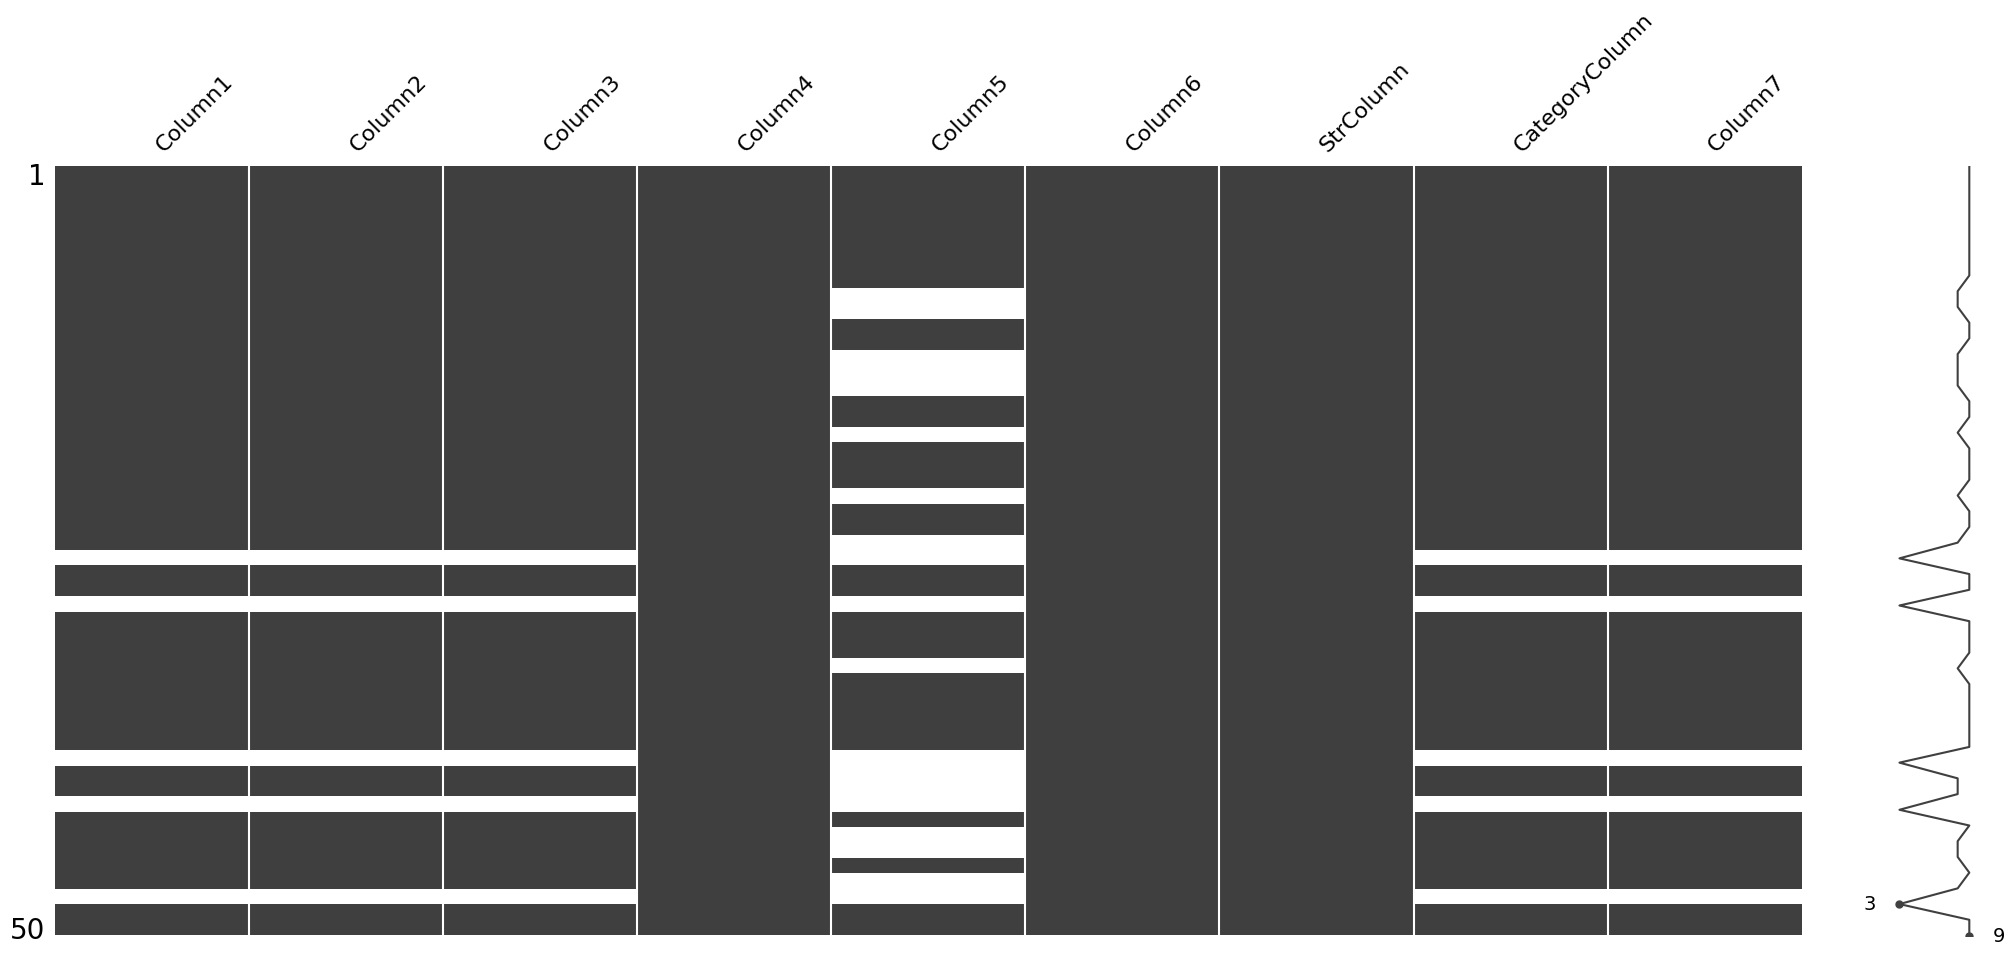

In [52]:
#50
#msno.matrix()
#Veri setinde kayıp veri olan sütunları anlayabilmek için bir grafik çizer
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df)
plt.show()

In [53]:
#51
#pd.dropna()
#Veri setinde na olan satırları atar 
clear_df1 = df["Column5"].dropna()
print(clear_df1)

0     2.0
1     1.0
2     1.0
3     2.0
4     1.0
5     2.0
6     1.0
7     1.0
10    1.0
11    1.0
15    2.0
16    1.0
18    1.0
19    2.0
20    2.0
22    2.0
23    1.0
26    1.0
27    2.0
29    2.0
30    2.0
31    2.0
33    1.0
34    1.0
35    1.0
36    1.0
37    2.0
42    1.0
45    2.0
48    2.0
49    2.0
Name: Column5, dtype: float64


In [54]:
#52
clear_df2 = df.dropna()
print(clear_df2)

     Column1  Column2 Column3   Column4  Column5  Column6 StrColumn  \
0   0.374540      2.0       C -2.655176      2.0       15      str0   
1   0.950714      2.0       B  0.345518      1.0       15      str1   
2   0.731994      4.0       C -0.395516      1.0       12      str2   
3   0.598658      8.0       C -0.289137      2.0       15      str3   
4   0.156019      7.0       A  0.452936      1.0       17      str4   
5   0.155995      9.0       C -0.166061      2.0       11      str5   
6   0.058084      8.0       C  0.214939      1.0       14      str6   
7   0.866176      5.0       B -2.022315      1.0       10      str7   
10  0.020584      8.0       C -0.018551      1.0       12     str10   
11  0.969910      9.0       C -1.673505      1.0       13     str11   
15  0.183405      7.0       B -0.432609      2.0       14     str15   
16  0.304242      9.0       A -0.659182      1.0       15     str16   
18  0.431945      1.0       C  0.477754      1.0       18     str18   
19  0.

In [55]:
#53
#pd.fillna()
#Veri setinde na olan değerleri doldurur
fill_df1 = df["Column1"].fillna(0)
print(fill_df1)

0     0.374540
1     0.950714
2     0.731994
3     0.598658
4     0.156019
5     0.155995
6     0.058084
7     0.866176
8     0.601115
9     0.708073
10    0.020584
11    0.969910
12    0.832443
13    0.212339
14    0.181825
15    0.183405
16    0.304242
17    0.524756
18    0.431945
19    0.291229
20    0.611853
21    0.139494
22    0.292145
23    0.366362
24    0.456070
25    0.000000
26    0.199674
27    0.514234
28    0.000000
29    0.046450
30    0.607545
31    0.170524
32    0.065052
33    0.948886
34    0.965632
35    0.808397
36    0.304614
37    0.097672
38    0.000000
39    0.440152
40    0.122038
41    0.000000
42    0.034389
43    0.909320
44    0.258780
45    0.662522
46    0.311711
47    0.000000
48    0.546710
49    0.184854
Name: Column1, dtype: float64


In [56]:
#54
mean_col5 = df["Column5"].mean()
fill_df2 = df["Column5"].fillna(mean_col5)
print(mean_col5)
print("\n")
print(fill_df2)

1.4838709677419355


0     2.000000
1     1.000000
2     1.000000
3     2.000000
4     1.000000
5     2.000000
6     1.000000
7     1.000000
8     1.483871
9     1.483871
10    1.000000
11    1.000000
12    1.483871
13    1.483871
14    1.483871
15    2.000000
16    1.000000
17    1.483871
18    1.000000
19    2.000000
20    2.000000
21    1.483871
22    2.000000
23    1.000000
24    1.483871
25    1.483871
26    1.000000
27    2.000000
28    1.483871
29    2.000000
30    2.000000
31    2.000000
32    1.483871
33    1.000000
34    1.000000
35    1.000000
36    1.000000
37    2.000000
38    1.483871
39    1.483871
40    1.483871
41    1.483871
42    1.000000
43    1.483871
44    1.483871
45    2.000000
46    1.483871
47    1.483871
48    2.000000
49    2.000000
Name: Column5, dtype: float64
